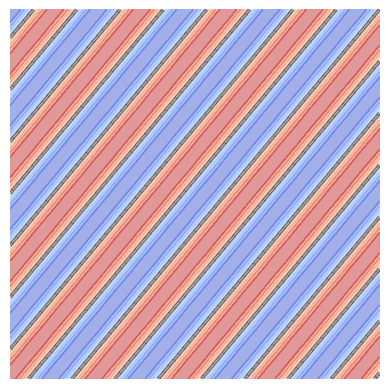

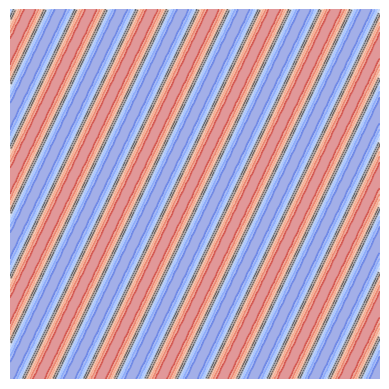

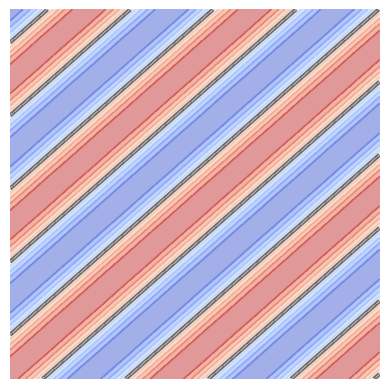

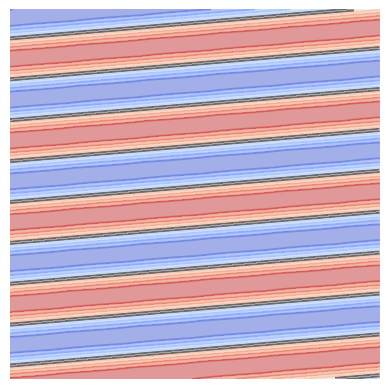

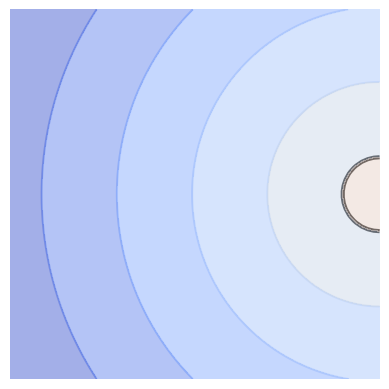

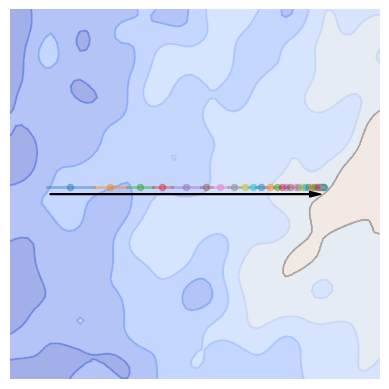

In [11]:
import os
import utils
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import cm
import matplotlib.patches as patches


path = "testing/ws-algo-vis-fig/"


for i in range(4):
    utils.plot_prior(path + f"ws-basis-{i}.bin", plt.gca())
    plt.axis("off")
    plt.savefig(f"figures/ws-algo-vis-fig-basis-{i}.pdf", bbox_inches='tight',pad_inches = 0, dpi = 300)
    plt.show()


utils.plot_prior(path + f"ws-mean.bin", plt.gca())
plt.axis("off")
plt.savefig(f"figures/ws-algo-vis-fig-mean.pdf", bbox_inches='tight',pad_inches = 0, dpi = 300)
plt.show()

file = path+"ws-real-100.bin"
real = np.reshape(np.fromfile(path+"ws-real-100.bin", dtype=np.float64), (64,64)).T

affine_interval_cs = np.reshape(np.fromfile(file.replace("ws-real-100.bin", "affine-interval-centers.bin"), dtype=np.float64), (-1,3))
affine_interval_extends =np.reshape(np.fromfile(file.replace("ws-real-100.bin", "affine-interval-extends.bin"), dtype=np.float64), (-1,3))


xs = np.linspace(-1,1, 64)
xx, yy = np.meshgrid(xs,xs)
utils.plot_realization(real, plt.gca(), xx, yy,clw=1)

style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")



for i, c in enumerate(affine_interval_cs):
    ortho_extend = np.array([-affine_interval_extends[i,1], affine_interval_extends[i,0]]) / np.sqrt(np.sum(affine_interval_extends[i]**2))
    offset = 0.04
    p = plt.scatter(affine_interval_cs[i,0]+ offset*ortho_extend[0], affine_interval_cs[i,1]+ offset*ortho_extend[1], s=20, alpha=0.4)

    plt.plot(
        [affine_interval_cs[i,0] - affine_interval_extends[i,0] + offset*ortho_extend[0], affine_interval_cs[i,0] + affine_interval_extends[i,0] + offset*ortho_extend[0]], 
        [affine_interval_cs[i,1] - affine_interval_extends[i,1] + offset*ortho_extend[1], affine_interval_cs[i,1]+ affine_interval_extends[i,1] + offset*ortho_extend[1]],c=p.get_facecolor(),lw=2)

    # if(i < affine_interval_cs.shape[0]-1):
    #     plt.gca().add_patch(patches.FancyArrowPatch(affine_interval_cs[i,:2], affine_interval_cs[i+1,:2],
    #                      connectionstyle="arc3,rad=.4", **kw))

plt.gca().add_patch(patches.FancyArrowPatch(affine_interval_cs[0,:2]-affine_interval_extends[0,:2], affine_interval_cs[-1,:2]+affine_interval_extends[-1,:2], **kw))

plt.xlim(np.min(xs), np.max(xs))
plt.ylim(np.min(xs), np.max(xs))
plt.axis("off")
plt.savefig(f"figures/ws-algo-vis-trace.pdf", bbox_inches='tight',pad_inches = 0, dpi = 300)
plt.show()
